In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(ROOT_DIR, "data")
TIMEFRAME_DATA_DIR = os.path.join(DATA_DIR,"1m_Data")
BTC_CLOSE_PRICES = os.path.join(TIMEFRAME_DATA_DIR,"SOL_USDT_1m.csv")

print(BTC_CLOSE_PRICES)

/Users/indranilbiswas/Desktop/PCA-Mean-Reversion/data/1m_Data/SOL_USDT_1m.csv


In [18]:
btc_close_data_df = pd.read_csv(BTC_CLOSE_PRICES,usecols=['timestamp','close'], parse_dates=['timestamp'])
btc_close_data_df['log_return'] = np.log(
    btc_close_data_df['close'] / btc_close_data_df['close'].shift(1)
)

mu = btc_close_data_df['log_return'].mean()
sigma = btc_close_data_df['log_return'].std()

S_0 = btc_close_data_df['close'].iloc[-1]


In [19]:
T = 10
N = 20
dt = 1
Z = np.random.normal(0,1,(T,N))

increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z


In [20]:
log_paths = np.cumsum(increments, axis=0)

log_paths = np.vstack([np.zeros(N), log_paths])

S_paths = S_0 * np.exp(log_paths)

print(S_paths)

[[166.48       166.48       166.48       166.48       166.48
  166.48       166.48       166.48       166.48       166.48
  166.48       166.48       166.48       166.48       166.48
  166.48       166.48       166.48       166.48       166.48      ]
 [166.33705353 166.43964207 166.03538643 166.53516047 166.06471412
  166.27543265 166.50686043 166.31053973 166.53606646 166.74206299
  166.45051529 166.58891284 166.40188045 165.92804615 166.62245384
  166.21751779 166.26848102 166.20675224 166.43537244 166.03713154]
 [165.97172436 166.37349895 165.90952481 165.92659975 166.3214829
  166.00295259 167.05562551 166.23111474 166.17577224 166.67880659
  166.17812036 165.91439125 166.45703021 166.60743588 166.93647903
  166.21817333 166.02921069 167.04574054 166.32757982 166.18252396]
 [166.01713753 166.00557383 165.84691953 166.21442368 166.38984541
  166.08668899 167.22751506 166.23946498 165.52771029 166.93160911
  166.3372689  165.73276348 166.26642619 166.74529784 166.9401768
  166.332875

In [21]:
p10 = np.percentile(S_paths, 10, axis=1)
p25 = np.percentile(S_paths, 25, axis=1)
p50 = np.percentile(S_paths, 50, axis=1)
p75 = np.percentile(S_paths, 75, axis=1)
p90 = np.percentile(S_paths, 90, axis=1)


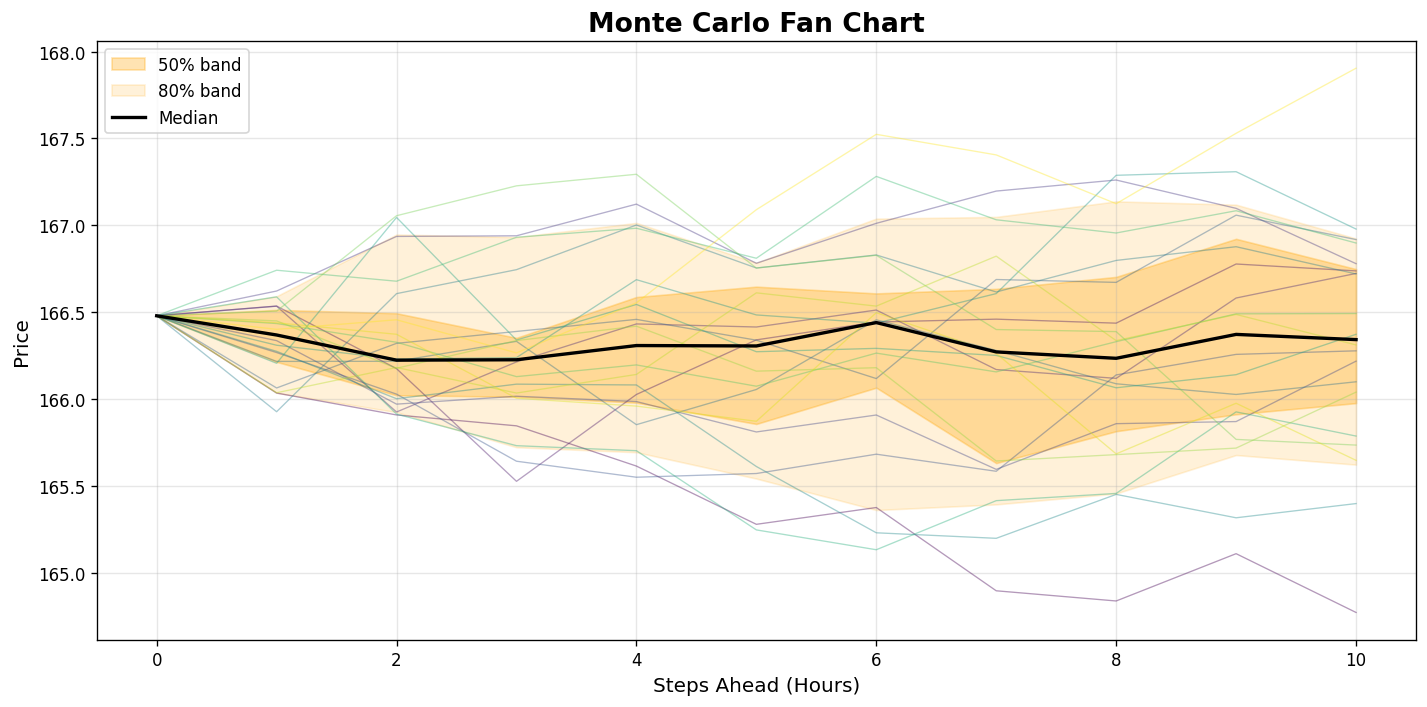

In [22]:
plt.figure(figsize=(12,6), dpi=120)
t = np.arange(S_paths.shape[0])


plt.fill_between(t, p25, p75, color='orange', alpha=0.3, label="50% band")
plt.fill_between(t, p10, p90, color='orange', alpha=0.15, label="80% band")


colors = plt.cm.viridis(np.linspace(0, 1, 20))
for idx, i in enumerate(np.random.choice(S_paths.shape[1], size=20, replace=False)):
    plt.plot(t, S_paths[:, i], color=colors[idx], alpha=0.4, linewidth=0.8)


plt.plot(t, p50, color='black', linewidth=2, label='Median')


plt.title('Monte Carlo Fan Chart', fontsize=16, weight='bold')
plt.xlabel('Steps Ahead (Hours)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
